<a href="https://colab.research.google.com/github/ArmandoSep/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!

1. Generate and numerically represent a confidence interval

In [87]:
! wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

--2020-04-13 22:53:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-04-13 22:53:01 (613 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                                                 'budget','physician-fee-freeze','el-salvador-aid',
                                                 'religious-groups','anti-satellite-ban',
                                                 'aid-t-contras','mx-aissile','immigration',
                                                 'synfuels','education','right-to-sue','crime','duty-free',
                                                 'south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-t-contras,mx-aissile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [90]:
# Replace y to 1, n to 0, ? to NaN
df = df.replace({'y':1, 'n':0, '?': np.NaN})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-t-contras,mx-aissile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Create a dataset for republicans and democrats

rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']

In [92]:
rep = rep.dropna(0)
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-t-contras,mx-aissile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
28,republican,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
30,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
33,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
35,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [93]:
rep.isnull().sum()

party                   0
handicapped-infants     0
water-project           0
budget                  0
physician-fee-freeze    0
el-salvador-aid         0
religious-groups        0
anti-satellite-ban      0
aid-t-contras           0
mx-aissile              0
immigration             0
synfuels                0
education               0
right-to-sue            0
crime                   0
duty-free               0
south-africa            0
dtype: int64

In [94]:
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-t-contras,mx-aissile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [95]:
rep['religious-groups'].values

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [96]:
rep['religious-groups'].describe()

count    108.000000
mean       0.870370
std        0.337461
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: religious-groups, dtype: float64

In [0]:
# Create confidence interval

def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # pass extra parameter (ddof=1) ti calculate sample standard deviation
  s = data.std(ddof=1)
  stderr= s/ np.sqrt(n)
  # look for t statistic that corresponds to 95% area under the curve
  # for my given degrees of freedom.
  t= stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  margin_of_error = t*stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [98]:
# 95% confidence interval
from scipy import stats
mean, lower, upper = confidence_interval(rep['religious-groups'])

print(mean)
print(lower)
print(upper)

0.8703703703703703
0.8682800529185721
0.8724606878221686


In [99]:
# Margin of error

0.8724606878221686 - 0.8703703703703703

0.002090317451798218

2. Graphically (with a plot) represent the confidence interval

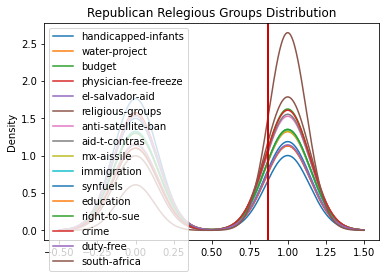

In [100]:
CI = confidence_interval(rep['religious-groups'])

df.plot.density()
plt.title('Republican Relegious Groups Distribution')
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[0], color='black')
plt.axvline(x=CI[2], color='red');
plt.show()

3. Interpret the confidence interval - what does it tell you about the data and its distribution?

The confidence interval is 0.2%, this means that the data set is large enough to have a small variance

4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

In [101]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [102]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [103]:
df['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [104]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [105]:
# Create an array of observed frequencies. Used margins to see value counts

observed_frequencies = pd.crosstab(df['race'], df['education-num'], margins=True)

observed_frequencies


education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
race,,,,,,,,,,,,,,,,,
Amer-Indian-Eskimo,0,4,2,9,5,16,14,5,119,79,19,8,21,5,2,3,311
Asian-Pac-Islander,6,5,18,11,9,13,21,9,226,208,38,29,289,88,41,28,1039
Black,5,16,21,56,89,133,153,70,1174,746,112,107,330,86,15,11,3124
Other,2,9,13,17,8,9,10,14,78,51,6,8,33,7,4,2,271
White,38,134,279,553,403,762,977,335,8904,6207,1207,915,4682,1537,514,369,27816
All,51,168,333,646,514,933,1175,433,10501,7291,1382,1067,5355,1723,576,413,32561


In [0]:
observed = pd.crosstab(df['race'], df['education-num'])

observed = observed.values

In [107]:
# Expected value calculation
# (row1Total * Column1Total)/TotalObersavations

# ! year of education white
(27816*51)/32561

43.56794938730383

In [108]:
row_sums = observed_frequencies.iloc[0:5, 16:].values
row_sums = row_sums.T[0]

row_sums

array([  311,  1039,  3124,   271, 27816])

In [109]:
col_sums = observed_frequencies.iloc[5:, 0:16].values
col_sums = col_sums[0]

col_sums

array([   51,   168,   333,   646,   514,   933,  1175,   433, 10501,
        7291,  1382,  1067,  5355,  1723,   576,   413])

In [110]:
total_total = df.shape[0]

total_total

32561

In [111]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(5, 16)
[[4.87116489e-01 1.60461902e+00 3.18058413e+00 6.17014219e+00
  4.90937011e+00 8.91136636e+00 1.12227819e+01 4.13571451e+00
  1.00298240e+02 6.96385553e+01 1.31999017e+01 1.01912411e+01
  5.11472314e+01 1.64568963e+01 5.50155094e+00 3.94468843e+00]
 [1.62737631e+00 5.36076902e+00 1.06258100e+01 2.06134332e+01
  1.64014004e+01 2.97714137e+01 3.74934738e+01 1.38167440e+01
  3.35079973e+02 2.32650994e+02 4.40987070e+01 3.40472651e+01
  1.70874512e+02 5.49797918e+01 1.83797795e+01 1.31785572e+01]
 [4.89309296e+00 1.61184239e+01 3.19490188e+01 6.19791775e+01
  4.93147016e+01 8.95148183e+01 1.12733024e+02 4.15433187e+01
  1.00749744e+03 6.99520408e+02 1.32593225e+02 1.02371180e+02
  5.13774761e+02 1.65309788e+02 5.52631676e+01 3.96244587e+01]
 [4.24464851e-01 1.39823715e+00 2.77150579e+00 5.37655477e+00
  4.27793987e+00 7.76520991e+00 9.77933724e+00 3.60378981e+00
  8.73981450e+01 6.06818280e+01 1.15021652e+01 8.88047050e+00
  4.45688093e+01 1.43402537e+01 4.79395596e+00 3.43733301e+

In [112]:
chi2 = ((observed-expected)**2 / expected).sum()
chi2

730.6712962254583

In [113]:
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(chi2)
print(p_value)
print(dof)
print(expected)

730.6712962254583
5.547319569858748e-116
60
[[4.87116489e-01 1.60461902e+00 3.18058413e+00 6.17014219e+00
  4.90937011e+00 8.91136636e+00 1.12227819e+01 4.13571451e+00
  1.00298240e+02 6.96385553e+01 1.31999017e+01 1.01912411e+01
  5.11472314e+01 1.64568963e+01 5.50155094e+00 3.94468843e+00]
 [1.62737631e+00 5.36076902e+00 1.06258100e+01 2.06134332e+01
  1.64014004e+01 2.97714137e+01 3.74934738e+01 1.38167440e+01
  3.35079973e+02 2.32650994e+02 4.40987070e+01 3.40472651e+01
  1.70874512e+02 5.49797918e+01 1.83797795e+01 1.31785572e+01]
 [4.89309296e+00 1.61184239e+01 3.19490188e+01 6.19791775e+01
  4.93147016e+01 8.95148183e+01 1.12733024e+02 4.15433187e+01
  1.00749744e+03 6.99520408e+02 1.32593225e+02 1.02371180e+02
  5.13774761e+02 1.65309788e+02 5.52631676e+01 3.96244587e+01]
 [4.24464851e-01 1.39823715e+00 2.77150579e+00 5.37655477e+00
  4.27793987e+00 7.76520991e+00 9.77933724e+00 3.60378981e+00
  8.73981450e+01 6.06818280e+01 1.15021652e+01 8.88047050e+00
  4.45688093e+01 1.4340

Conclusion: based on a chi^2 of 730.67 and a p-value of ~0, we reject the null hypotehesis that the number of years of education obtained by cencus responders and the race of those responders is independet, and suggest the alternative that these two variables are dependent. 

In [114]:
# Using scipy

stats.chisquare(observed, expected)

Power_divergenceResult(statistic=array([ 18.79800055,  45.56052639,  47.16256428,  31.48888656,
        41.48363613,  37.94784279,  23.04468499,  54.63617119,
        68.02014295,   8.57774267,   9.81246503,   1.52932126,
       170.68762272,  72.4928778 ,  60.51181037,  38.91700054]), pvalue=array([8.61108021e-04, 3.04000329e-09, 1.41053486e-09, 2.43302110e-06,
       2.13421775e-08, 1.14866655e-07, 1.24049727e-04, 3.87230949e-11,
       5.94027605e-14, 7.25654425e-02, 4.37079897e-02, 8.21435191e-01,
       7.44534586e-36, 6.75237190e-15, 2.26443268e-12, 7.24693724e-08]))

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)